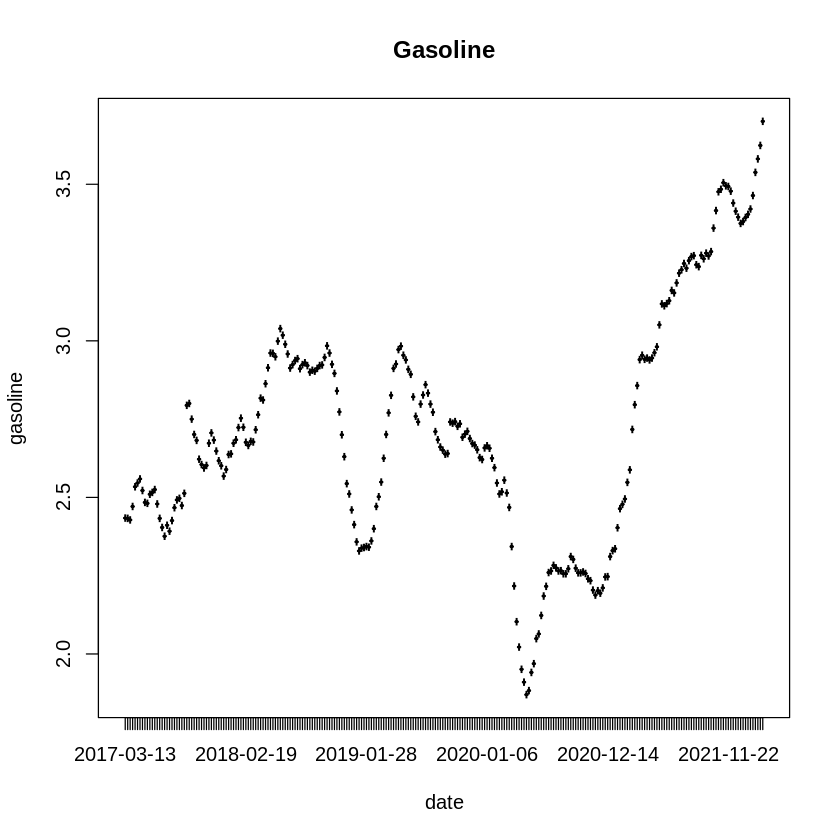

In [1]:
data <- read.csv("./data.csv", header = TRUE)
plot(data ,type = "l", col = "blue",lwd = 2,main = "Gasoline")

In [2]:
head(data)

date,gasoline
2017-03-13,2.434
2017-03-20,2.433
2017-03-27,2.428
2017-04-03,2.471
2017-04-10,2.534
2017-04-17,2.546


In [3]:
y <- data$gasoline

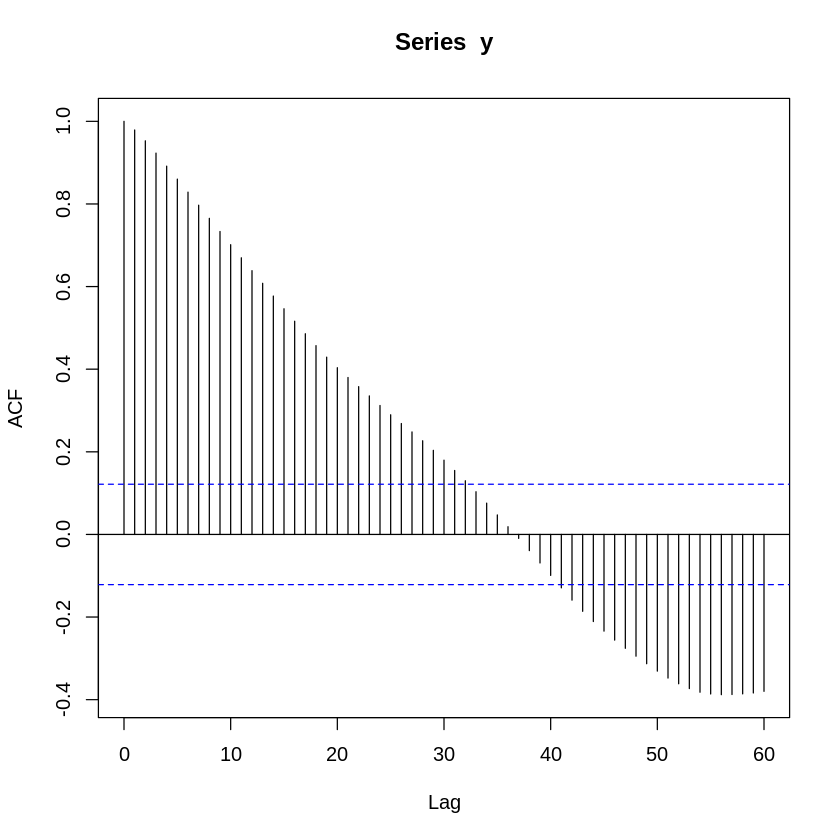

In [4]:
acf(y, 60)

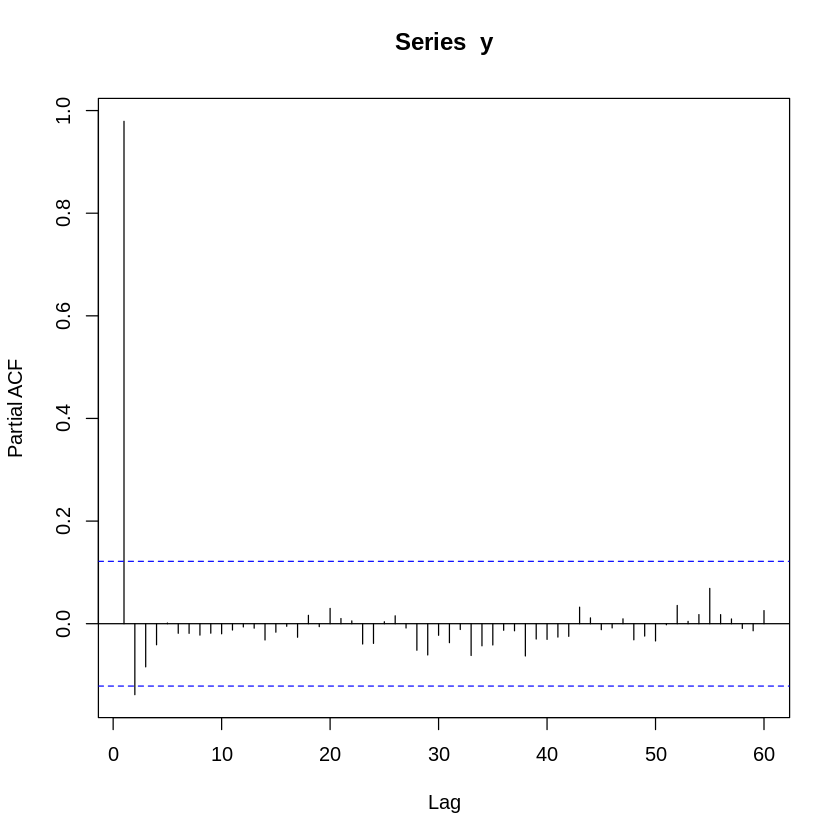

In [5]:
pacf(y, 60)

Сезонность не наблюдается.

In [6]:
library(bsts)

Loading required package: BoomSpikeSlab
Loading required package: Boom
Loading required package: MASS

Attaching package: ‘Boom’

The following object is masked from ‘package:stats’:

    rWishart

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: xts
Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Attaching package: ‘bsts’

The following object is masked from ‘package:BoomSpikeSlab’:

    SuggestBurn



In [7]:
ss <- list()
ss <- AddLocalLinearTrend(ss, y)
# ss <- AddSeasonal(ss, data$gasoline, nseasons = 52)
model1 <- bsts(y, ss, niter = 500)

=-=-=-=-= Iteration 0 Sun Apr  3 13:28:26 2022 =-=-=-=-=
=-=-=-=-= Iteration 50 Sun Apr  3 13:28:26 2022 =-=-=-=-=
=-=-=-=-= Iteration 100 Sun Apr  3 13:28:26 2022 =-=-=-=-=
=-=-=-=-= Iteration 150 Sun Apr  3 13:28:26 2022 =-=-=-=-=
=-=-=-=-= Iteration 200 Sun Apr  3 13:28:26 2022 =-=-=-=-=
=-=-=-=-= Iteration 250 Sun Apr  3 13:28:26 2022 =-=-=-=-=
=-=-=-=-= Iteration 300 Sun Apr  3 13:28:26 2022 =-=-=-=-=
=-=-=-=-= Iteration 350 Sun Apr  3 13:28:26 2022 =-=-=-=-=
=-=-=-=-= Iteration 400 Sun Apr  3 13:28:26 2022 =-=-=-=-=
=-=-=-=-= Iteration 450 Sun Apr  3 13:28:26 2022 =-=-=-=-=


In [8]:
pred <- predict(model1, horizon = 12)

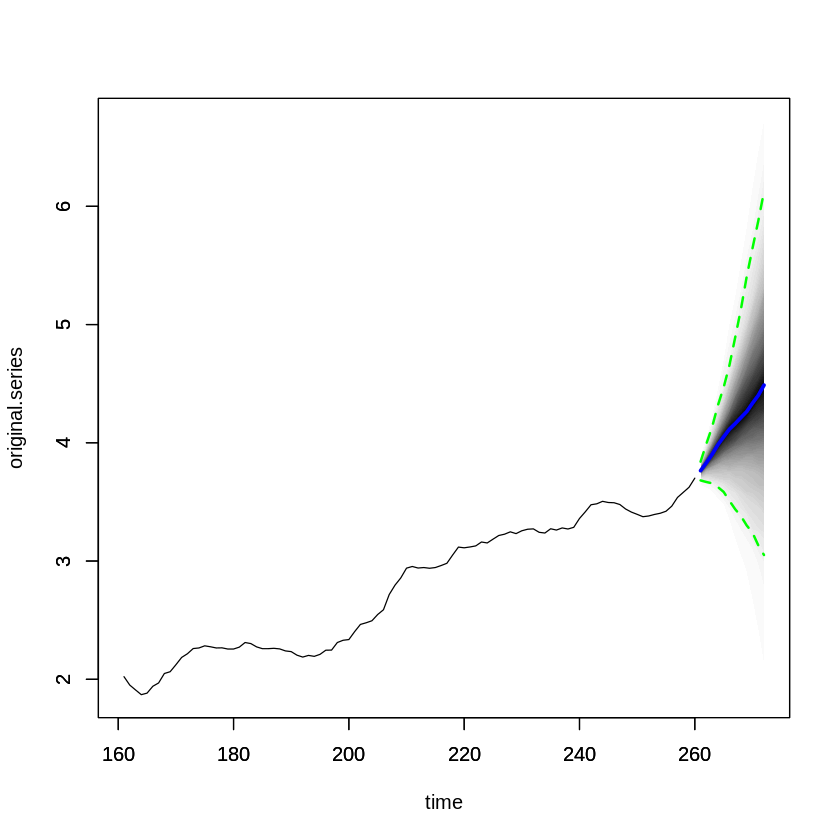

In [9]:
plot(pred, plot.original = 100)

In [10]:
e <- rnorm(length(y), mean=0, sd=1)

In [11]:
z <- 0.5 + y + rnorm(length(y), mean=0, sd=1)

In [12]:
df <- data.frame(z = z, y = y, e = e)

In [13]:
ss <- list()
ss <- AddLocalLinearTrend(ss, z)
model2 <- bsts(z ~ ., ss, niter = 500, data = df, expected.model.size = 1)

=-=-=-=-= Iteration 0 Sun Apr  3 13:28:27 2022 =-=-=-=-=
=-=-=-=-= Iteration 50 Sun Apr  3 13:28:27 2022 =-=-=-=-=
=-=-=-=-= Iteration 100 Sun Apr  3 13:28:27 2022 =-=-=-=-=
=-=-=-=-= Iteration 150 Sun Apr  3 13:28:27 2022 =-=-=-=-=
=-=-=-=-= Iteration 200 Sun Apr  3 13:28:27 2022 =-=-=-=-=
=-=-=-=-= Iteration 250 Sun Apr  3 13:28:27 2022 =-=-=-=-=
=-=-=-=-= Iteration 300 Sun Apr  3 13:28:27 2022 =-=-=-=-=
=-=-=-=-= Iteration 350 Sun Apr  3 13:28:27 2022 =-=-=-=-=
=-=-=-=-= Iteration 400 Sun Apr  3 13:28:27 2022 =-=-=-=-=
=-=-=-=-= Iteration 450 Sun Apr  3 13:28:27 2022 =-=-=-=-=


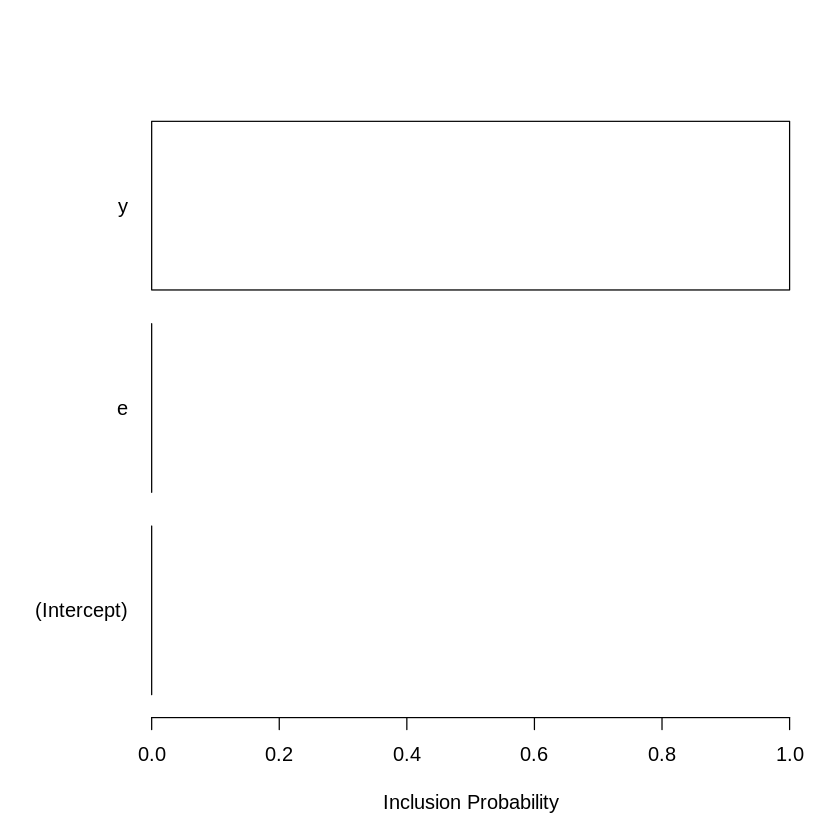

In [14]:
plot(model2, 'coef')

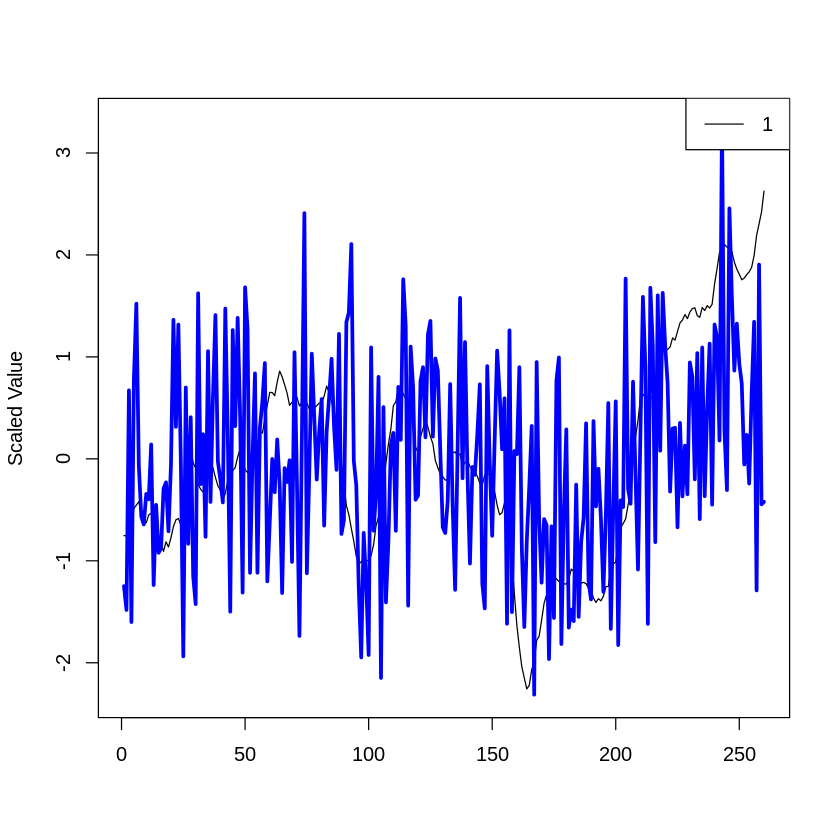

In [15]:
plot(model2, 'predictors')

In [16]:
ss <- list()
ss <- AddLocalLinearTrend(ss, z)
model3 <- bsts(z ~ ., ss, niter = 500, data = df, expected.model.size = 2)

=-=-=-=-= Iteration 0 Sun Apr  3 13:28:27 2022 =-=-=-=-=
=-=-=-=-= Iteration 50 Sun Apr  3 13:28:27 2022 =-=-=-=-=
=-=-=-=-= Iteration 100 Sun Apr  3 13:28:27 2022 =-=-=-=-=
=-=-=-=-= Iteration 150 Sun Apr  3 13:28:27 2022 =-=-=-=-=
=-=-=-=-= Iteration 200 Sun Apr  3 13:28:28 2022 =-=-=-=-=
=-=-=-=-= Iteration 250 Sun Apr  3 13:28:28 2022 =-=-=-=-=
=-=-=-=-= Iteration 300 Sun Apr  3 13:28:28 2022 =-=-=-=-=
=-=-=-=-= Iteration 350 Sun Apr  3 13:28:28 2022 =-=-=-=-=
=-=-=-=-= Iteration 400 Sun Apr  3 13:28:28 2022 =-=-=-=-=
=-=-=-=-= Iteration 450 Sun Apr  3 13:28:28 2022 =-=-=-=-=


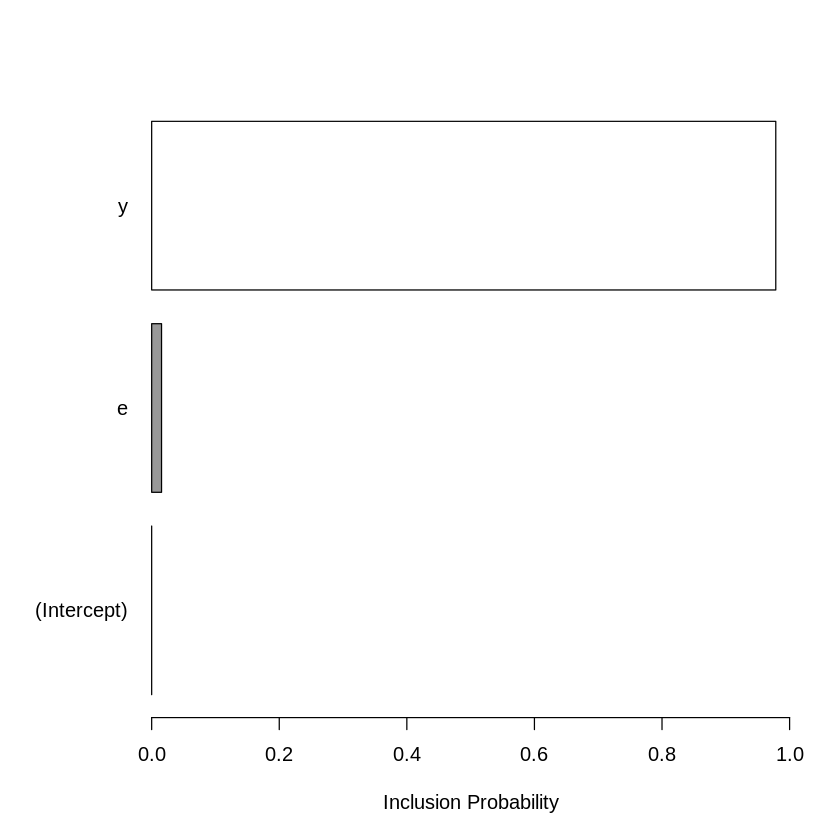

In [17]:
plot(model3, 'coef')

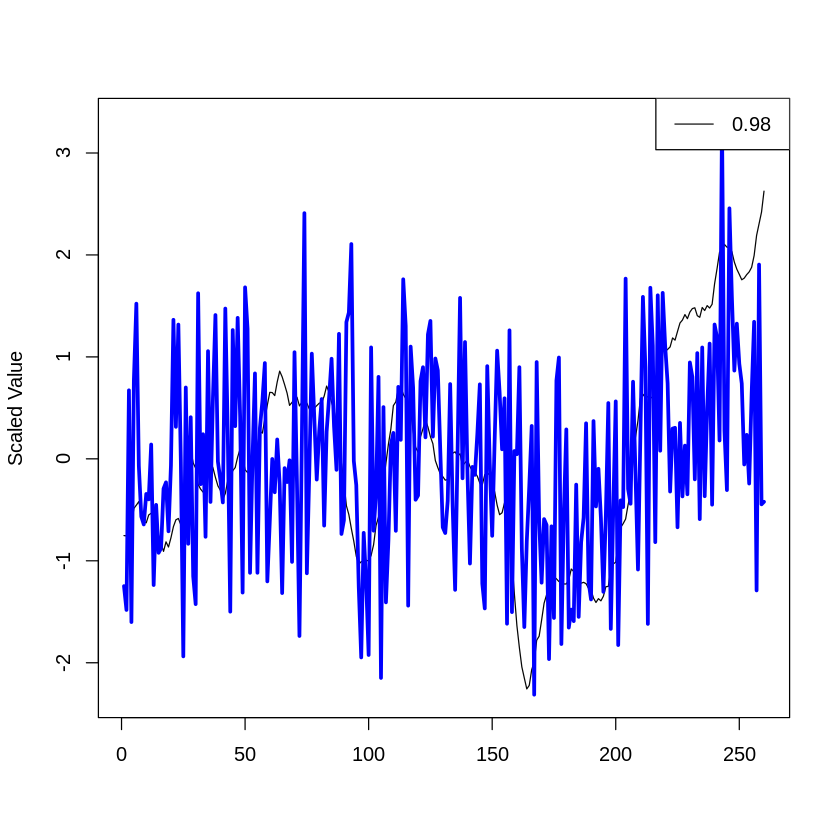

In [18]:
plot(model3, 'predictors')

В обеих моделях есть зависимость только от y. От шума зависимости нет.